<a href="https://colab.research.google.com/github/francisco-gamez/Callenge_Alura_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

df1 = pd.read_csv(url)
df1['Tienda'] = 'Tienda 1'

df2 = pd.read_csv(url2)
df2['Tienda'] = 'Tienda 2'

df3 = pd.read_csv(url3)
df3['Tienda'] = 'Tienda 3'

df4 = pd.read_csv(url4)
df4['Tienda'] = 'Tienda 4'

df = pd.concat([df1, df2, df3, df4], ignore_index=True)

df.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [113]:
# Convertir la columna 'Fecha de Compra' a tipo datetime
df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')

# Verificamos los valores que no se pudieron convertir (si los hay)
fechas_invalidas = df[df['Fecha de Compra'].isna()]

# Contar valores nulos por columna
nulos = df.isnull().sum()

# Verificar duplicados
duplicados = df.duplicated().sum()

# Eliminar duplicados si existen
df = df.drop_duplicates()

#1. Análisis de facturación



In [95]:
# Asegurar que 'Precio' y 'Costo de envío' sean numéricos
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

# Crear la columna 'Ganancia'
df['Ganancia'] = df['Precio'] - df['Costo de envío']


In [96]:
# Agrupamos por tienda para obtener los indicadores clave
resumen_tiendas = df.groupby('Tienda').agg({
    'Precio': 'sum',        # Ingreso bruto
    'Ganancia': ['sum', 'mean']  # Ingreso neto y ganancia promedio
})

# Renombramos columnas para claridad
resumen_tiendas.columns = ['Ingreso Bruto', 'Ingreso Neto', 'Ganancia Promedio']
resumen_tiendas = resumen_tiendas.reset_index()

# Mostramos el resumen
resumen_tiendas


,Tienda,Ingreso Bruto,Ingreso Neto,Ganancia Promedio
0,Tienda 1,1.150880e+09,1.089502e+09,461849.300551
1,Tienda 2,1.116344e+09,1.056858e+09,448011.191183
2,Tienda 3,1.098020e+09,1.039503e+09,440654.090716
3,Tienda 4,1.038376e+09,9.830583e+08,416903.435115


/tmp/ipython-input-97-1896595690.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resumen_tiendas, x='Tienda', y='Ganancia Promedio', palette='viridis')


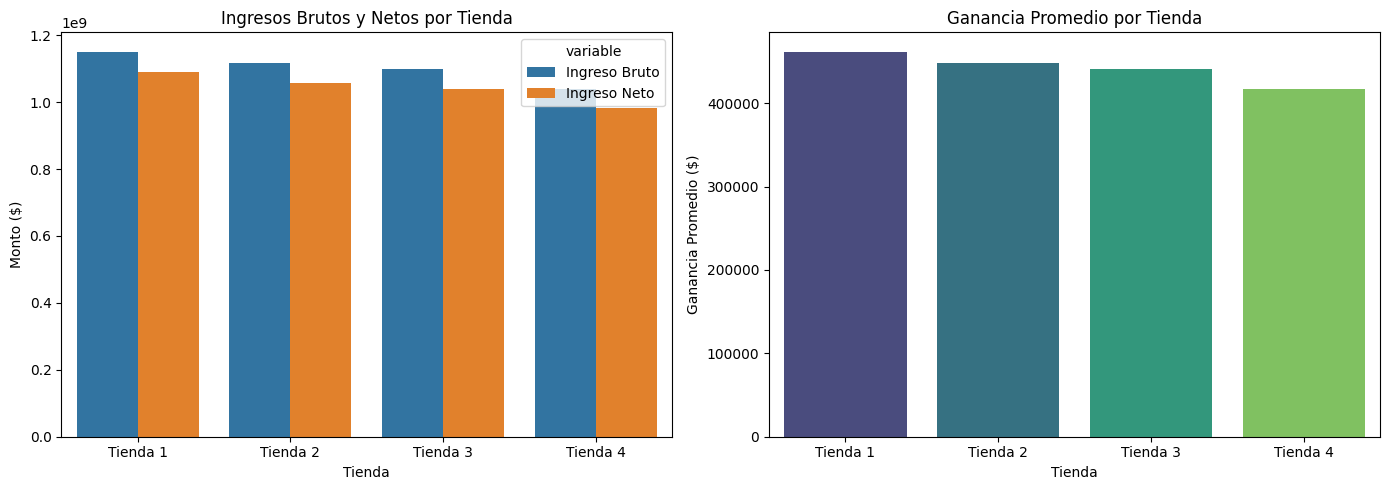

In [97]:
# Configuración visual
plt.figure(figsize=(14, 5))

# Ingreso Bruto y Neto
plt.subplot(1, 2, 1)
resumen_plot = resumen_tiendas.melt(id_vars='Tienda', value_vars=['Ingreso Bruto', 'Ingreso Neto'])
sns.barplot(data=resumen_plot, x='Tienda', y='value', hue='variable')
plt.title('Ingresos Brutos y Netos por Tienda')
plt.ylabel('Monto ($)')
plt.xlabel('Tienda')

# Ganancia Promedio
plt.subplot(1, 2, 2)
sns.barplot(data=resumen_tiendas, x='Tienda', y='Ganancia Promedio', palette='viridis')
plt.title('Ganancia Promedio por Tienda')
plt.ylabel('Ganancia Promedio ($)')
plt.xlabel('Tienda')

plt.tight_layout()
plt.show()


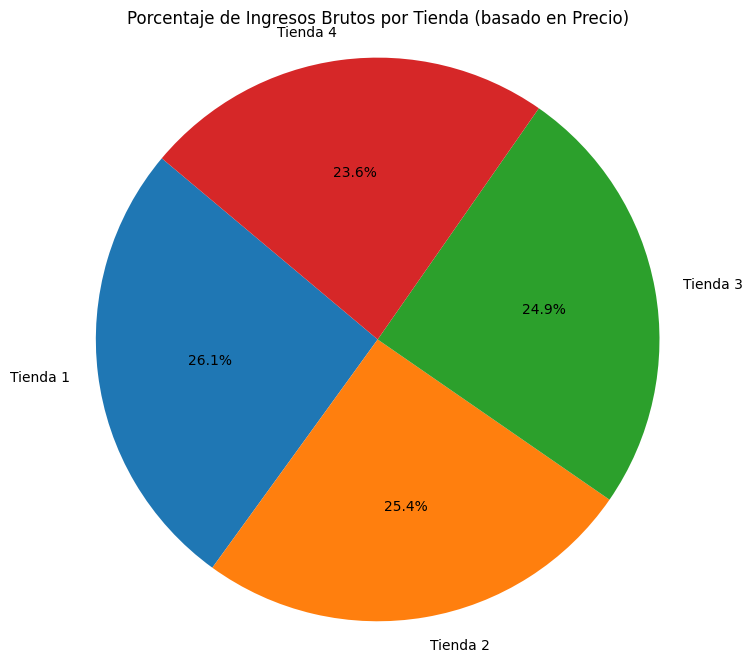

In [98]:
# Calcular ingresos brutos por tienda sumando 'Precio'
ingresos_por_tienda = df.groupby('Tienda')['Precio'].sum()

plt.figure(figsize=(8,8))
plt.pie(ingresos_por_tienda, labels=ingresos_por_tienda.index, autopct='%1.1f%%', startangle=140,
        colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Porcentaje de Ingresos Brutos por Tienda (basado en Precio)')
plt.axis('equal')  # Círculo perfecto
plt.show()


# 2. Ventas por categoría

In [99]:
# Agrupar por tienda y categoría, y contar la cantidad de productos vendidos
productos_por_categoria = df.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')

# Ver resultados ordenados
productos_por_categoria.sort_values(['Tienda', 'Cantidad Vendida'], ascending=[True, False], inplace=True)

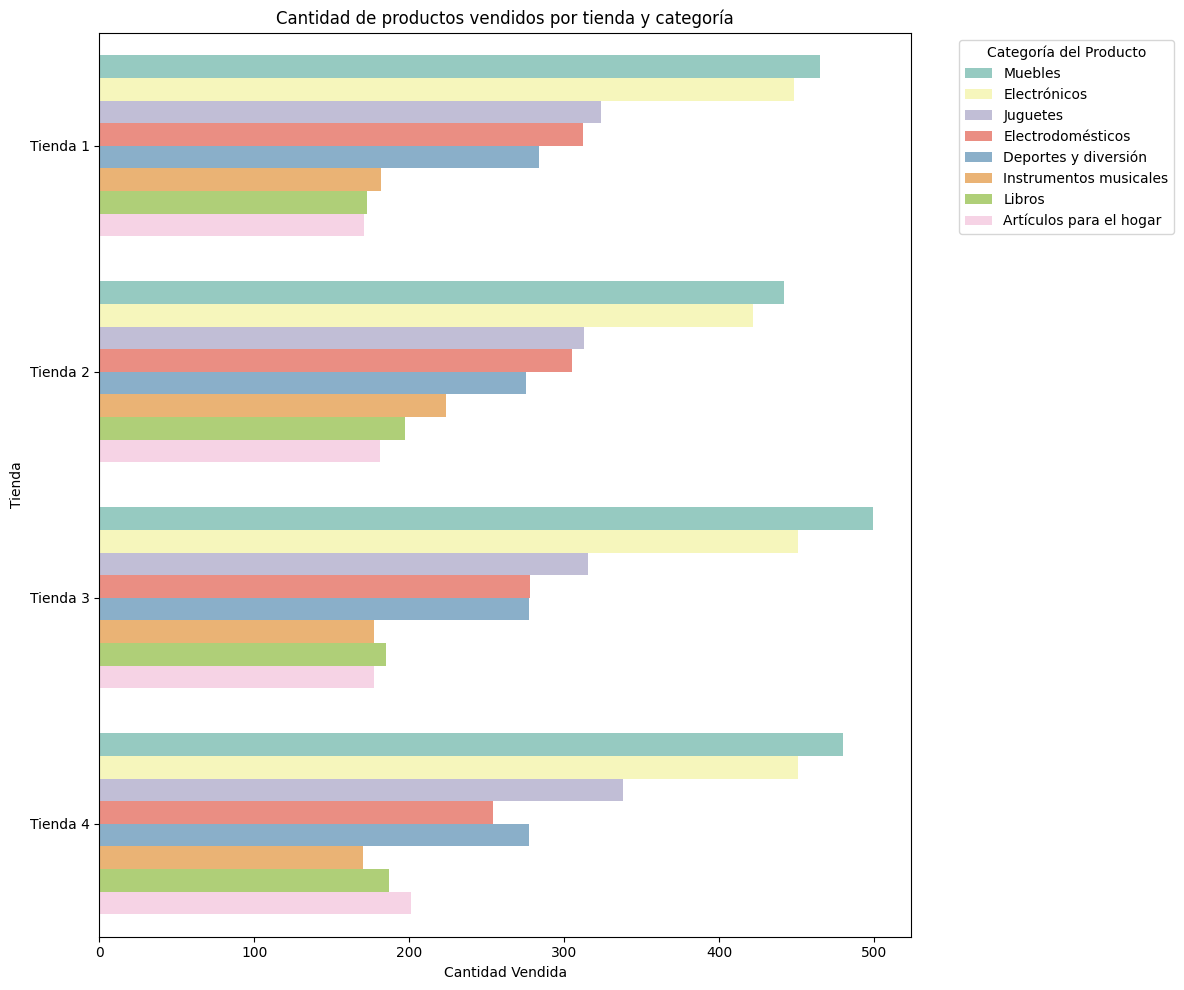

In [100]:
plt.figure(figsize=(12, 10))

# Crear gráfico con eje Y = Tienda, barras agrupadas por Categoría
sns.barplot(
    data=productos_por_categoria,
    x='Cantidad Vendida',
    y='Tienda',
    hue='Categoría del Producto',
    palette='Set3'
)

plt.title('Cantidad de productos vendidos por tienda y categoría')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Tienda')
plt.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [101]:
# Asegurarnos de que la columna 'Calificación' sea numérica
df['Calificación'] = pd.to_numeric(df['Calificación'], errors='coerce')

# Calcular promedio de calificación por tienda
calificacion_promedio = df.groupby('Tienda')['Calificación'].mean().reset_index()
calificacion_promedio.rename(columns={'Calificación': 'Calificación Promedio'}, inplace=True)

# Mostrar resultados
calificacion_promedio


,Tienda,Calificación Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


In [102]:
# Convertimos el mes a fecha completa para ordenar bien
df['Mes'] = df['Fecha de Compra'].dt.to_period('M').dt.to_timestamp()

# Agrupamos por tienda y mes para obtener calificación promedio mensual
calificacion_mensual = df.groupby(['Tienda', 'Mes'])['Calificación'].mean().reset_index()
calificacion_mensual.rename(columns={'Calificación': 'Calificación Promedio'}, inplace=True)

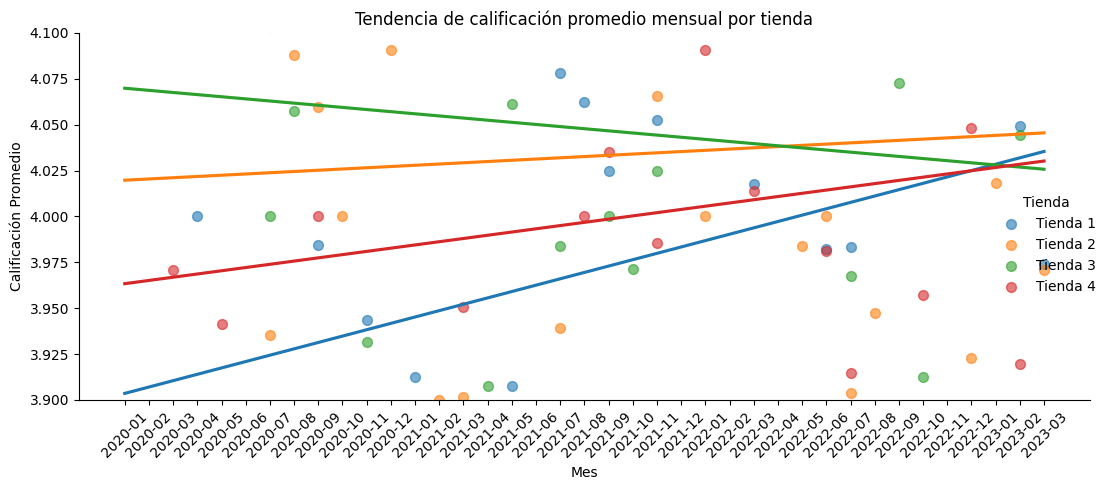

In [103]:
# Crear columna numérica para 'Mes'
calificacion_mensual['Mes_num'] = (calificacion_mensual['Mes'] - calificacion_mensual['Mes'].min())\
                                  .dt.days // 30  # Aproximamos a meses

# Graficar con lmplot usando 'Mes_num' como eje X
g = sns.lmplot(
    data=calificacion_mensual,
    x='Mes_num',
    y='Calificación Promedio',
    hue='Tienda',
    aspect=2,
    height=5,
    markers='o',
    scatter_kws={'s': 50, 'alpha': 0.6},
    ci=None
)

# Mejorar etiquetas X para mostrar meses reales
ax = g.axes[0,0]

# Convertir números a fechas legibles
meses_unicos = calificacion_mensual[['Mes_num', 'Mes']].drop_duplicates().sort_values('Mes_num')
ticks = meses_unicos['Mes_num']
labels = meses_unicos['Mes'].dt.strftime('%Y-%m')

ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45)

# Títulos y ajustes
plt.title('Tendencia de calificación promedio mensual por tienda')
plt.ylabel('Calificación Promedio')
plt.xlabel('Mes')
plt.ylim(3.9, 4.1)
plt.tight_layout()
plt.show()

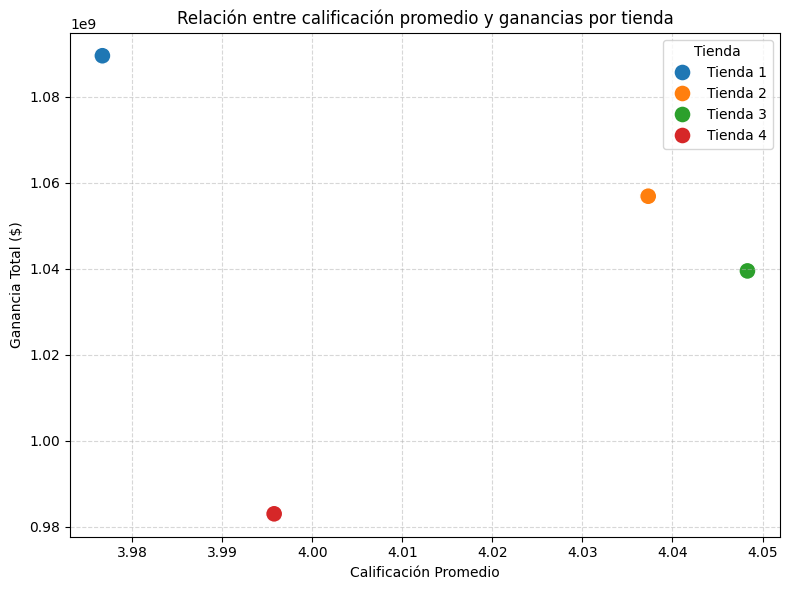

In [104]:
# Calcular ganancia total por tienda
ganancia_por_tienda = df.groupby('Tienda')['Ganancia'].sum().reset_index()
ganancia_por_tienda.rename(columns={'Ganancia': 'Ganancia Total'}, inplace=True)

# Unir los dos DataFrames
resumen_tiendas = pd.merge(calificacion_promedio, ganancia_por_tienda, on='Tienda')

plt.figure(figsize=(8, 6))

# Diagrama de dispersión
sns.scatterplot(
    data=resumen_tiendas,
    x='Calificación Promedio',
    y='Ganancia Total',
    hue='Tienda',
    s=150,
    palette='tab10'
)

# Ajustes estéticos
plt.title('Relación entre calificación promedio y ganancias por tienda')
plt.xlabel('Calificación Promedio')
plt.ylabel('Ganancia Total ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



# 4. Productos más y menos vendidos

In [105]:
# Agrupar por tienda y producto, sumando la cantidad vendida
ventas_por_producto = df.groupby(['Tienda', 'Producto'])['Cantidad de cuotas'].sum().reset_index()
ventas_por_producto.rename(columns={'Cantidad de cuotas': 'Cantidad Vendida'}, inplace=True)

# Función para obtener top 3 productos más y menos vendidos por tienda
def top_bottom_products(df_ventas, top_n=3):
    resultados = []
    tiendas = df_ventas['Tienda'].unique()
    for tienda in tiendas:
        data_tienda = df_ventas[df_ventas['Tienda'] == tienda]
        top = data_tienda.nlargest(top_n, 'Cantidad Vendida')
        bottom = data_tienda.nsmallest(top_n, 'Cantidad Vendida')

        resultados.append({
            'Tienda': tienda,
            'Top Productos': list(zip(top['Producto'], top['Cantidad Vendida'])),
            'Bottom Productos': list(zip(bottom['Producto'], bottom['Cantidad Vendida']))
        })
    return pd.DataFrame(resultados)

productos_destacados = top_bottom_products(ventas_por_producto, top_n=3)
productos_destacados

,Tienda,Top Productos,Bottom Productos
0,Tienda 1,"[(Secadora de ropa, 214), (TV LED UHD 4K, 196)...","[(Celular ABXY, 78), (Mochila, 90), (Dinosauri..."
1,Tienda 2,"[(Iniciando en programación, 223), (Iphone 15,...","[(Mesa de comedor, 89), (Bicicleta, 98), (Set ..."
2,Tienda 3,"[(Bicicleta, 191), (Estufa, 182), (Juego de me...","[(TV LED UHD 4K, 94), (Guitarra eléctrica, 100..."
3,Tienda 4,"[(Dashboards con Power BI, 196), (Cama box, 19...","[(Armario, 88), (Smartwatch, 93), (Guitarra el..."


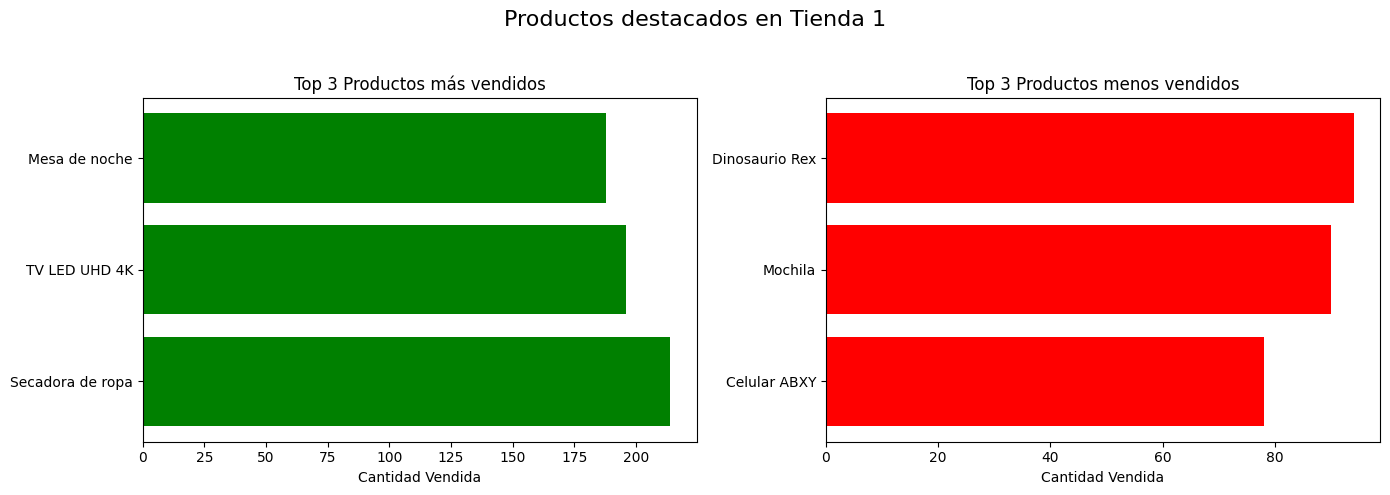

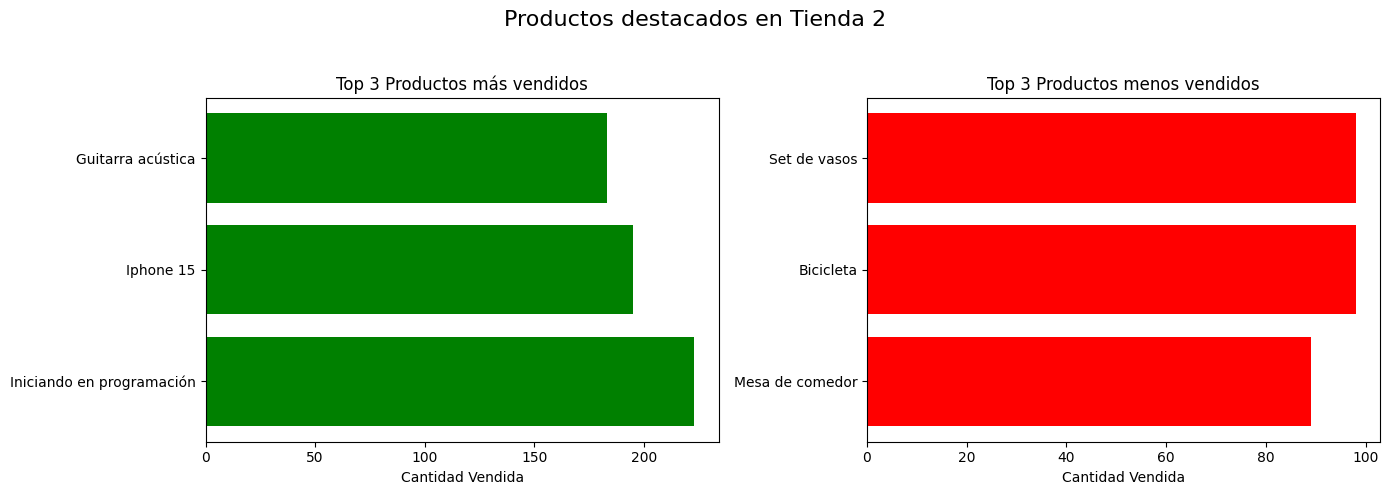

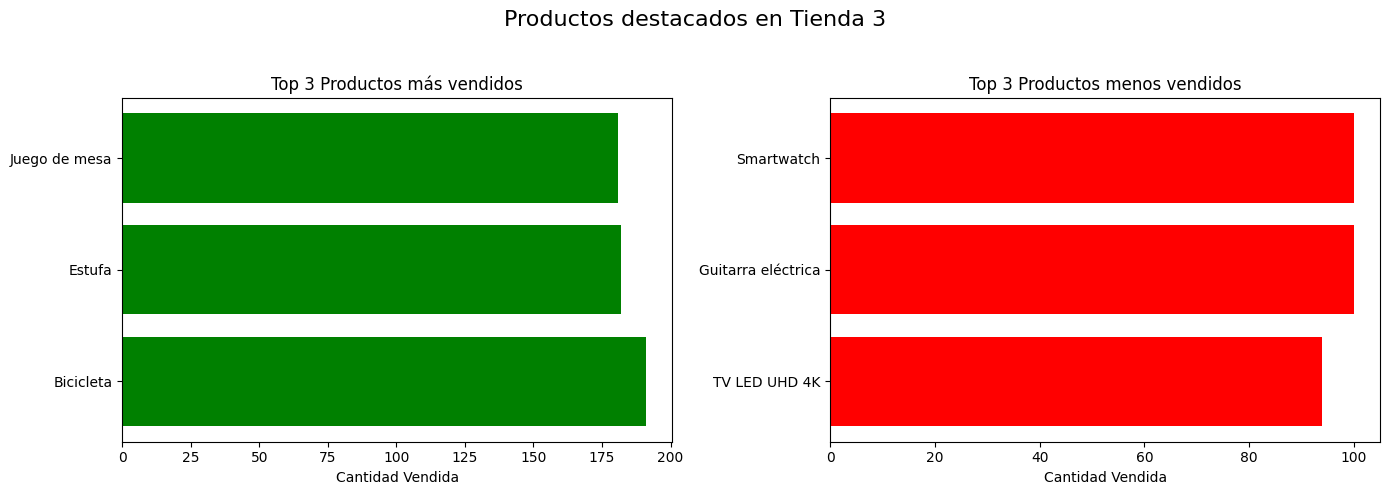

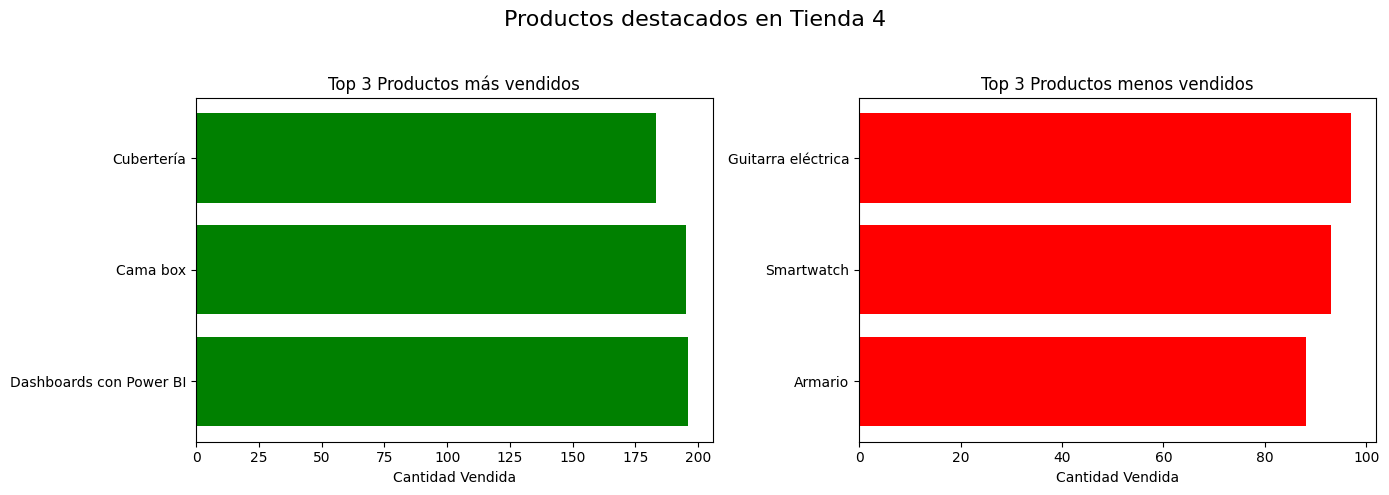

In [106]:
for index, row in productos_destacados.iterrows():
    tienda = row['Tienda']
    top_prod = row['Top Productos']
    bottom_prod = row['Bottom Productos']

    fig, axes = plt.subplots(1, 2, figsize=(14,5))
    fig.suptitle(f'Productos destacados en {tienda}', fontsize=16)

    # Gráfico Top productos
    axes[0].barh([p[0] for p in top_prod], [p[1] for p in top_prod], color='green')
    axes[0].set_title('Top 3 Productos más vendidos')
    axes[0].set_xlabel('Cantidad Vendida')

    # Gráfico Bottom productos
    axes[1].barh([p[0] for p in bottom_prod], [p[1] for p in bottom_prod], color='red')
    axes[1].set_title('Top 3 Productos menos vendidos')
    axes[1].set_xlabel('Cantidad Vendida')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


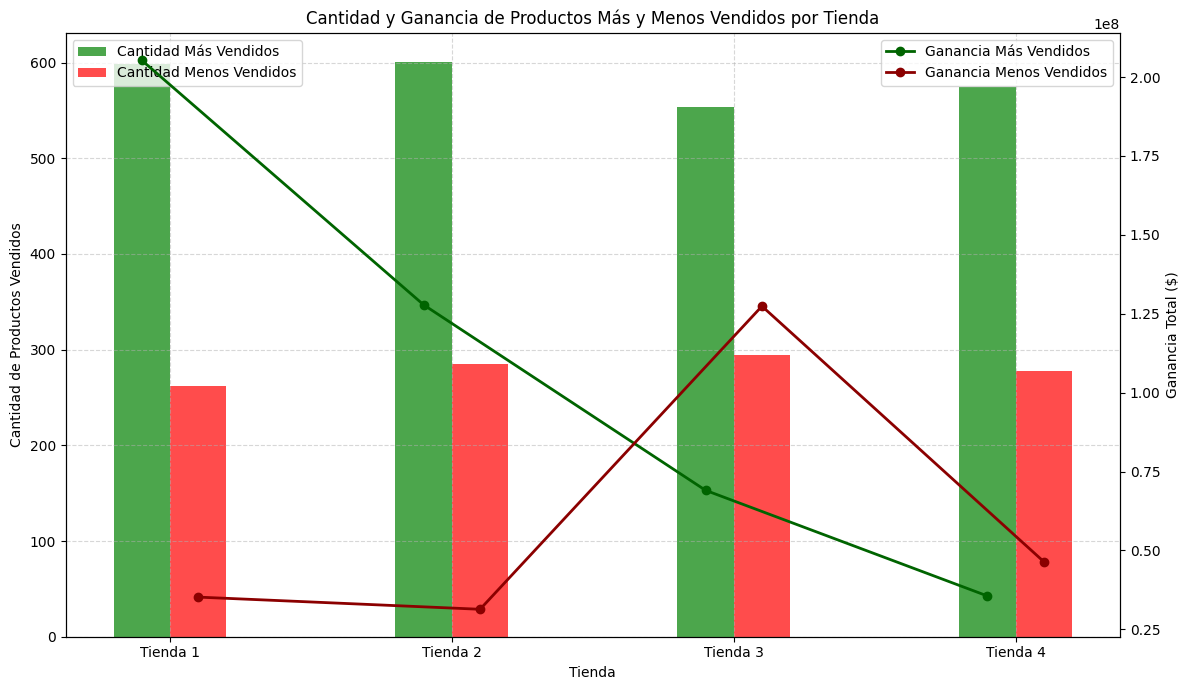

In [110]:
# Agrupar ventas por tienda y producto (cantidad y ganancia total)
ventas_producto = df.groupby(['Tienda', 'Producto']).agg({
    'Cantidad de cuotas': 'sum',
    'Ganancia': 'sum'
}).reset_index()

# Función para obtener top y bottom productos por tienda y sumar cantidades y ganancias
def resumen_area(df, top_n=3):
    tiendas = df['Tienda'].unique()
    resumen = []

    for tienda in tiendas:
        df_tienda = df[df['Tienda'] == tienda]

        top = df_tienda.nlargest(top_n, 'Cantidad de cuotas')
        bottom = df_tienda.nsmallest(top_n, 'Cantidad de cuotas')

        resumen.append({
            'Tienda': tienda,
            'Top Cantidad': top['Cantidad de cuotas'].sum(),
            'Top Ganancia': top['Ganancia'].sum(),
            'Bottom Cantidad': bottom['Cantidad de cuotas'].sum(),
            'Bottom Ganancia': bottom['Ganancia'].sum(),
        })
    return pd.DataFrame(resumen)

resumen_tiendas = resumen_area(ventas_producto)


# Datos
x = resumen_tiendas['Tienda']
cantidad_top = resumen_tiendas['Top Cantidad']
ganancia_top = resumen_tiendas['Top Ganancia']
cantidad_bottom = resumen_tiendas['Bottom Cantidad']
ganancia_bottom = resumen_tiendas['Bottom Ganancia']

fig, ax1 = plt.subplots(figsize=(12, 7))

# Barras para cantidades (eje Y izquierdo)
width = 0.2
indices = np.arange(len(x))

bars1 = ax1.bar(indices - width/2, cantidad_top, width, label='Cantidad Más Vendidos', color='green', alpha=0.7)
bars2 = ax1.bar(indices + width/2, cantidad_bottom, width, label='Cantidad Menos Vendidos', color='red', alpha=0.7)

ax1.set_xlabel('Tienda')
ax1.set_ylabel('Cantidad de Productos Vendidos')
ax1.set_xticks(indices)
ax1.set_xticklabels(x)
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.5)

# Eje Y derecho para ganancias
ax2 = ax1.twinx()
line1 = ax2.plot(indices - width/2, ganancia_top, label='Ganancia Más Vendidos', color='darkgreen', marker='o', linewidth=2)
line2 = ax2.plot(indices + width/2, ganancia_bottom, label='Ganancia Menos Vendidos', color='darkred', marker='o', linewidth=2)

ax2.set_ylabel('Ganancia Total ($)')
ax2.legend(loc='upper right')

plt.title('Cantidad y Ganancia de Productos Más y Menos Vendidos por Tienda')
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [115]:
# Calcular costo de envío promedio agrupando por tienda
costo_envio_promedio = df.groupby('Tienda')['Costo de envío'].mean().reset_index()
costo_envio_promedio.rename(columns={'Costo de envío': 'Costo de Envío Promedio'}, inplace=True)

# Mostrar el resultado
print(costo_envio_promedio)


     Tienda  Costo de Envío Promedio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


In [116]:
# Ingresos brutos por tienda
ingresos_brutos = df.groupby('Tienda')['Precio'].sum().reset_index(name='Ingresos Brutos')

# Costos de envío totales por tienda
costos_envio = df.groupby('Tienda')['Costo de envío'].sum().reset_index(name='Costos de Envío')

# Unir ambos dataframes
resumen_ingresos_costos = ingresos_brutos.merge(costos_envio, on='Tienda')

print(resumen_ingresos_costos)


     Tienda  Ingresos Brutos  Costos de Envío
0  Tienda 1     1.150880e+09       61377900.0
1  Tienda 2     1.116344e+09       59485100.0
2  Tienda 3     1.098020e+09       58516600.0
3  Tienda 4     1.038376e+09       55317400.0


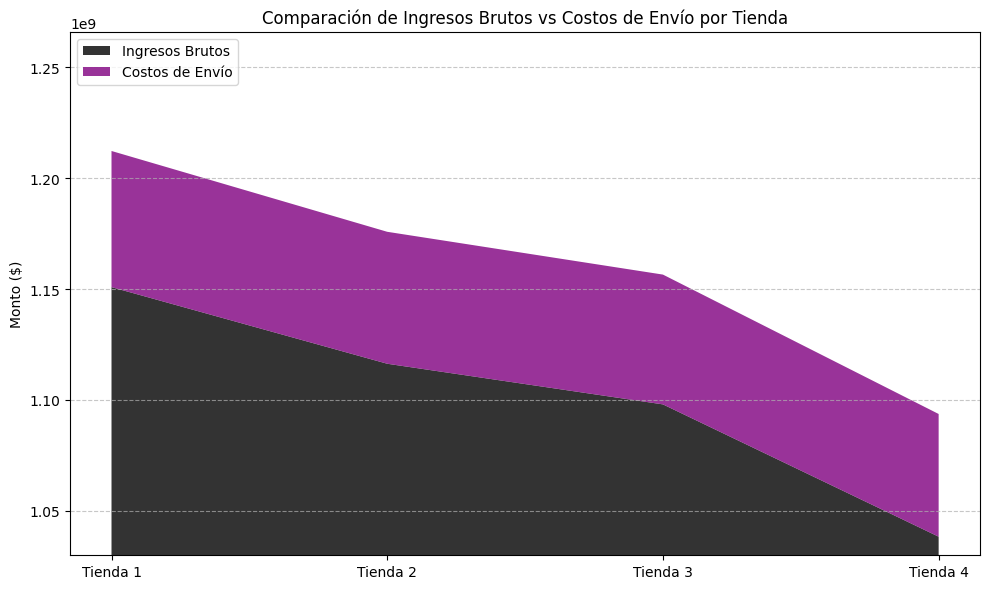

In [117]:
# Datos para la gráfica
tiendas = resumen_ingresos_costos['Tienda']
ingresos = resumen_ingresos_costos['Ingresos Brutos']
costos = resumen_ingresos_costos['Costos de Envío']

# Graficar áreas apiladas
plt.figure(figsize=(10,6))
plt.stackplot(tiendas, ingresos, costos, labels=['Ingresos Brutos', 'Costos de Envío'], colors=['black', 'purple'], alpha=0.8)
plt.ylabel('Monto ($)')
plt.title('Comparación de Ingresos Brutos vs Costos de Envío por Tienda')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(1.03e9, max(ingresos.max(), costos.max()) * 1.1)
plt.tight_layout()
plt.show()

# Informe Final

## Introducción

El objetivo de este análisis es apoyar al Sr. Juan en la decisión estratégica sobre cuál de sus cuatro tiendas debería vender para optimizar sus recursos y maximizar la rentabilidad total de su negocio. Para ello, se examinaron diversos factores, incluyendo los ingresos totales, la popularidad de las categorías de productos, la satisfacción de los clientes reflejada en calificaciones promedio, el desempeño de productos individuales y los costos promedio de envío.

## Conclusión
Después de un análisis detallado de los ingresos, ganancias, preferencias de los clientes y costos operativos, podemos observar que las tiendas presentan perfiles variados en cuanto a rentabilidad y desempeño. La Tienda 1 sobresale con los ingresos brutos más elevados y una ganancia sólida, aunque su calificación promedio es ligeramente inferior en comparación con las otras tiendas. En contraste, la Tienda 4 muestra los menores ingresos y ganancias, aunque mantiene una calificación estable y costos de envío relativamente bajos.

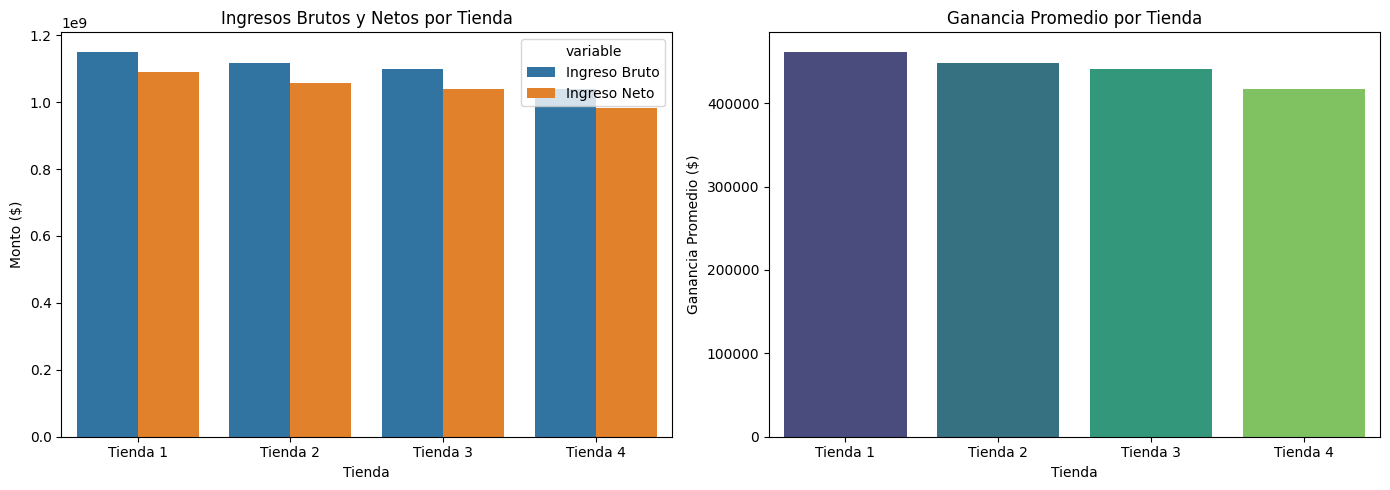

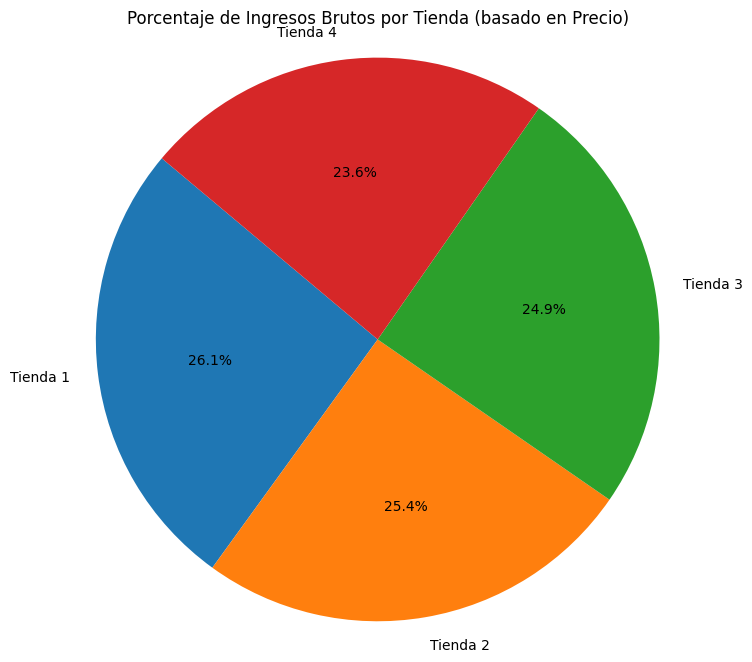

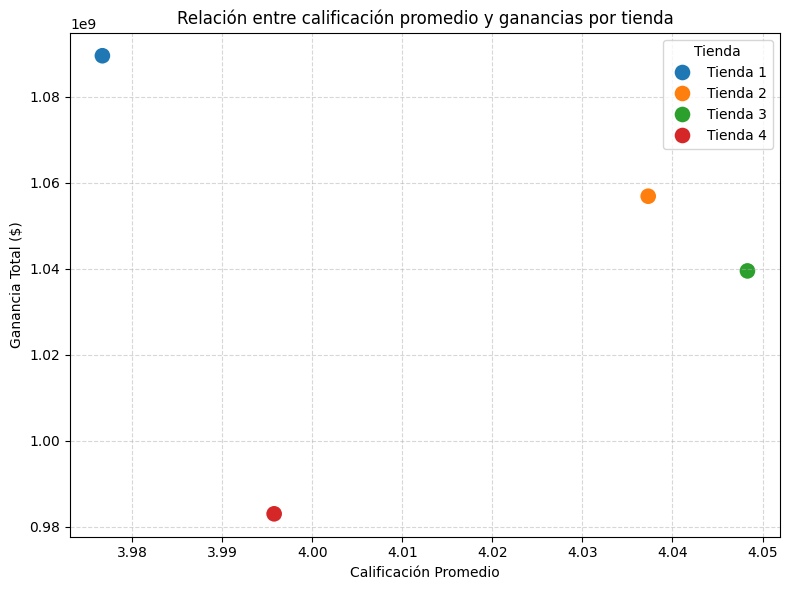

Las diferencias en los productos más vendidos y menos populares reflejan que cada tienda tiene su propio nicho de mercado, sin embargo la tienda 4 tiene un patron inusual, los productos menos vendidos generan mayor ganancia que los más vendidos. Esto sugiere una ineficiencia en la estrategia de ventas, la tienda está enfocada en mover productos que no son los más rentables.

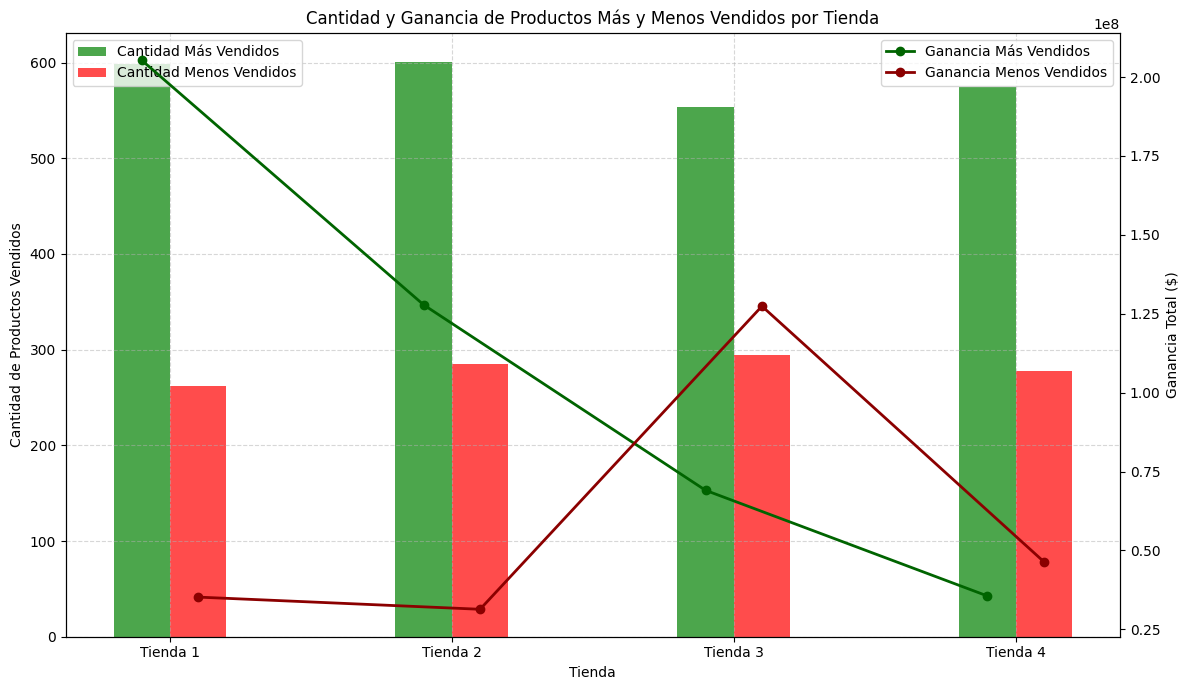

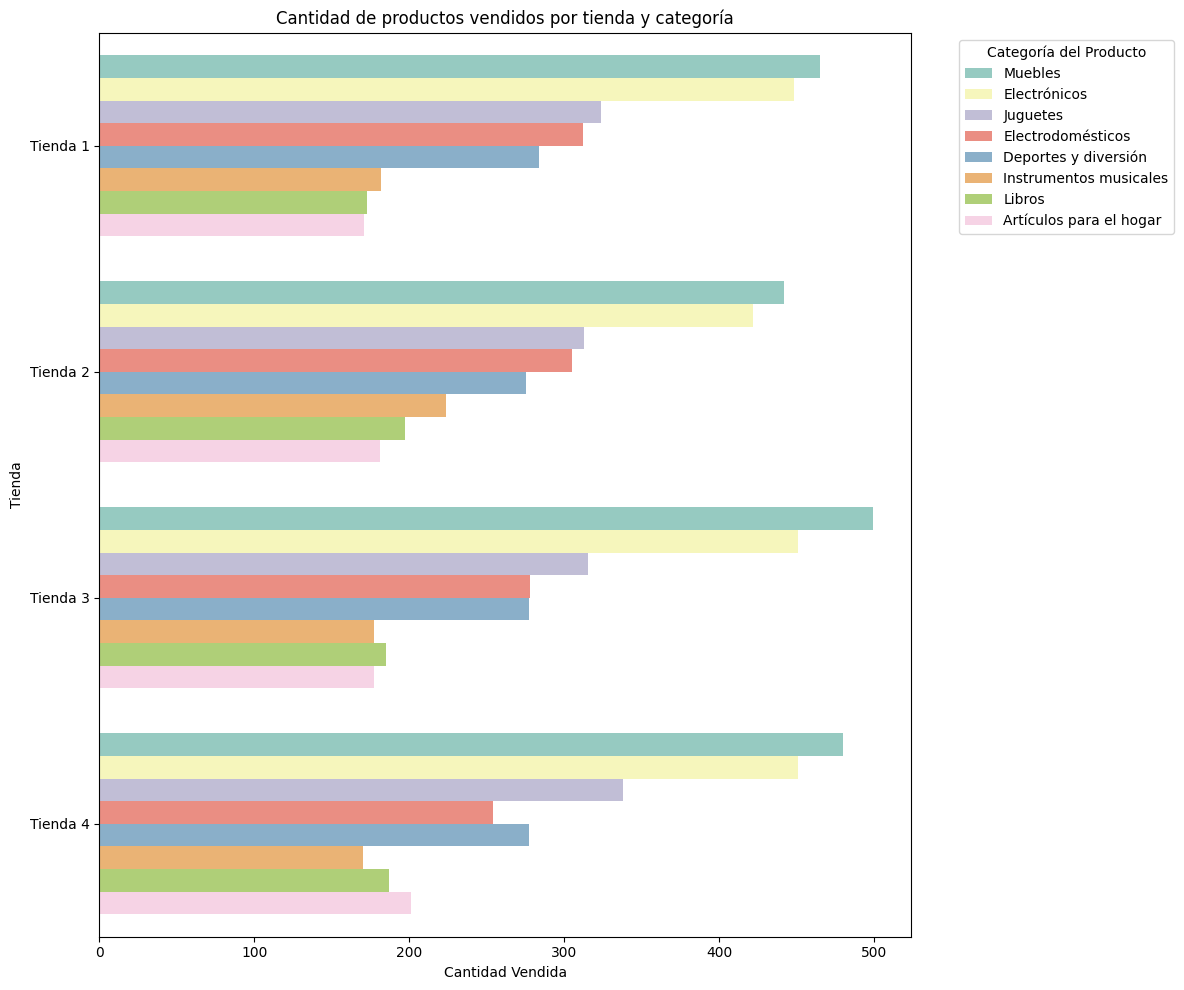

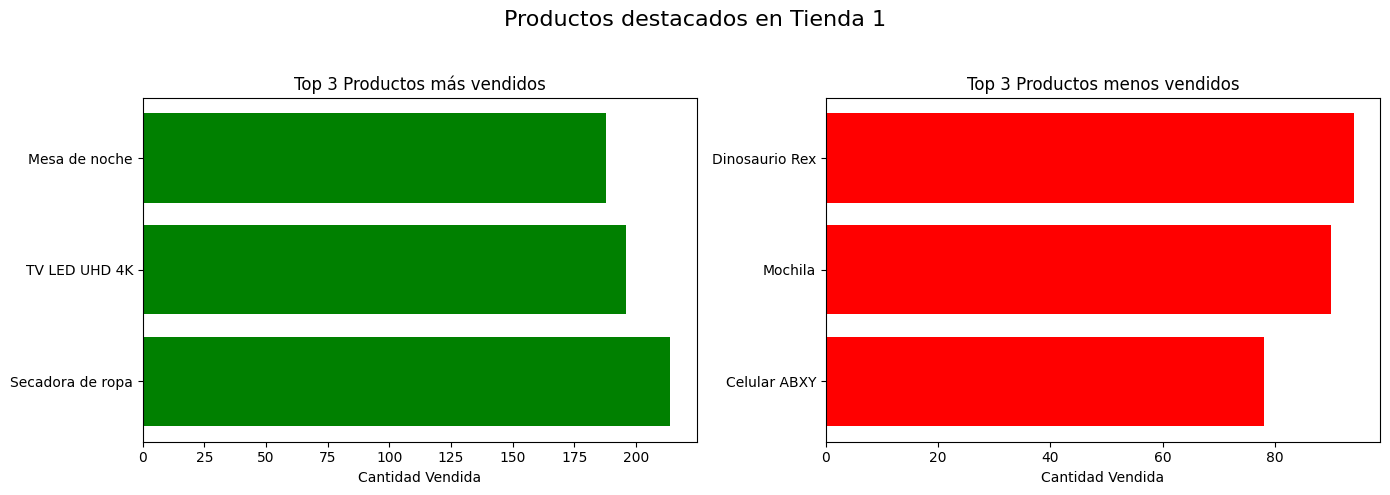

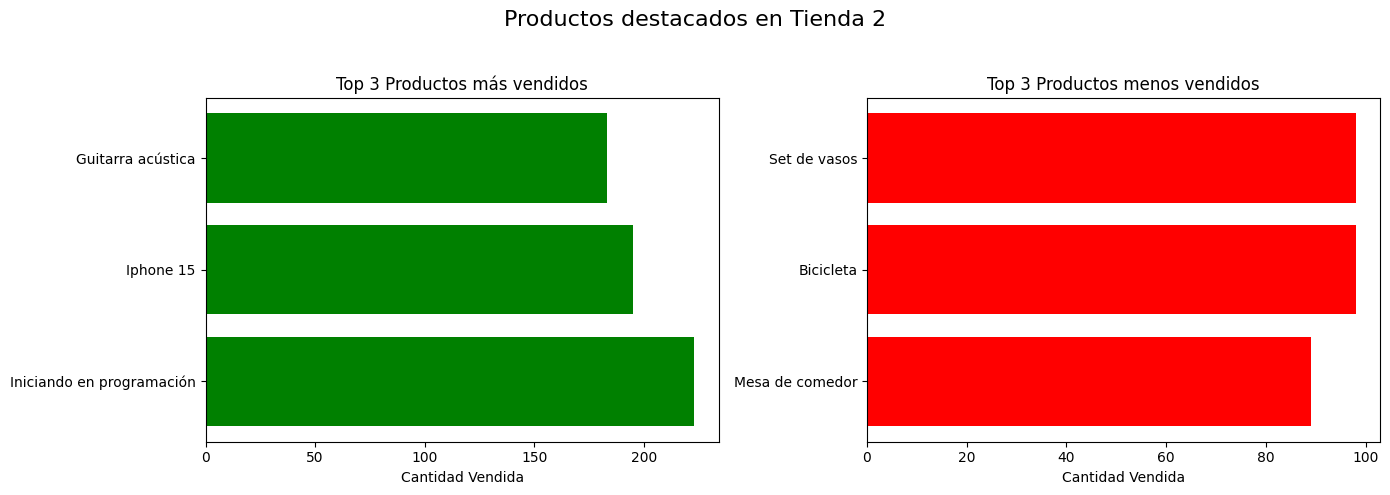

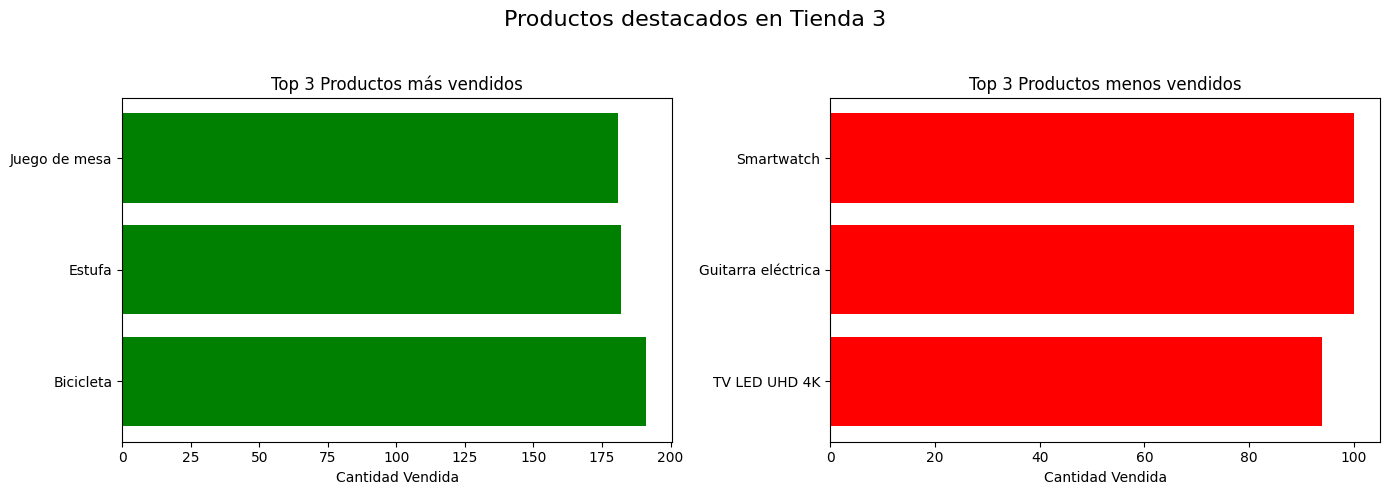

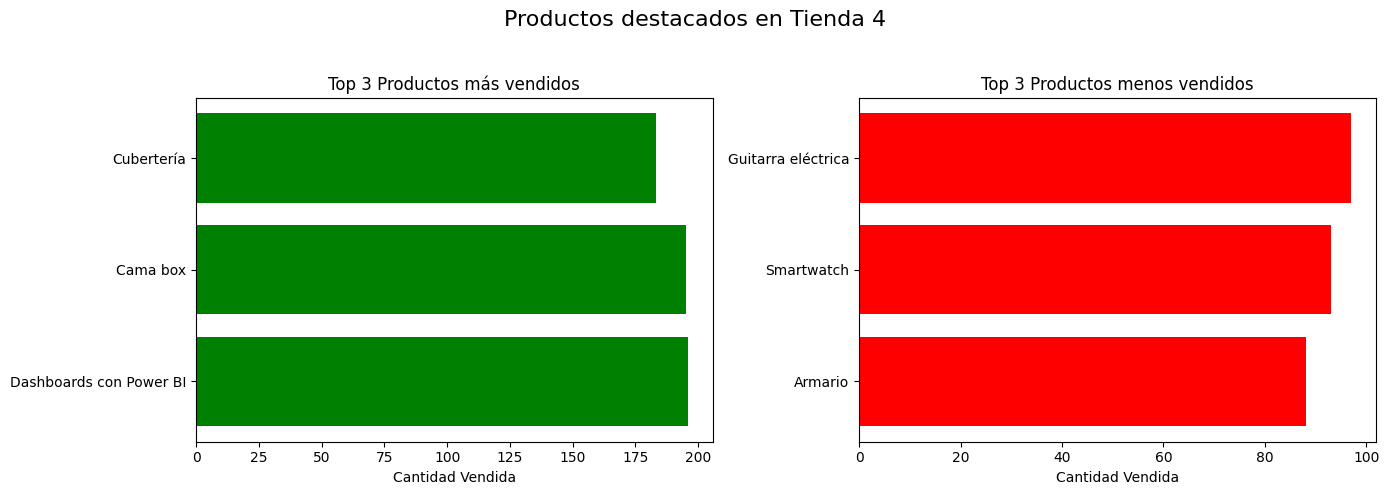

Las tendencias en la calificación de los clientes a lo largo del tiempo también aportan información valiosa: mientras algunas tiendas han mejorado su percepción de calidad, otras han experimentado ligeras disminuciones. Sin embargo, la relación entre la satisfacción del cliente y las ganancias no es lineal, lo que indica que otros factores operativos y de gestión influyen significativamente en la rentabilidad.

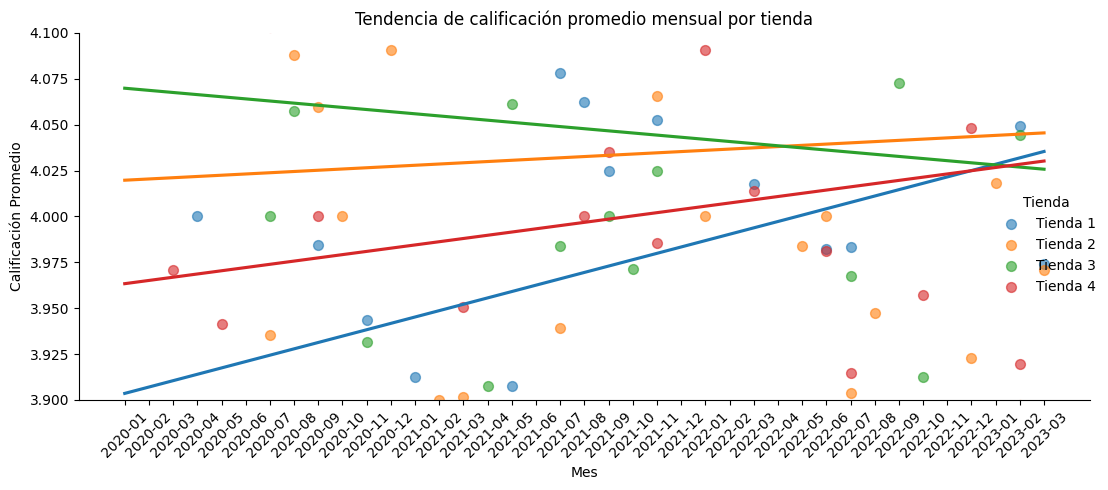

Finalmente, al comparar los costos de envío con los ingresos generados, se observa que aunque la Tienda 4 es la más eficiente en términos logísticos, esta ventaja no logra equilibrar su menor volumen de ventas y ganancias. Por ello, considerando un enfoque integral que evalúa tanto el rendimiento financiero como la satisfacción del cliente, la recomendación es que el Sr. Juan considere vender la Tienda 4. Esto permitirá optimizar su portafolio, enfocándose en las tiendas con mayor potencial de rentabilidad y crecimiento.

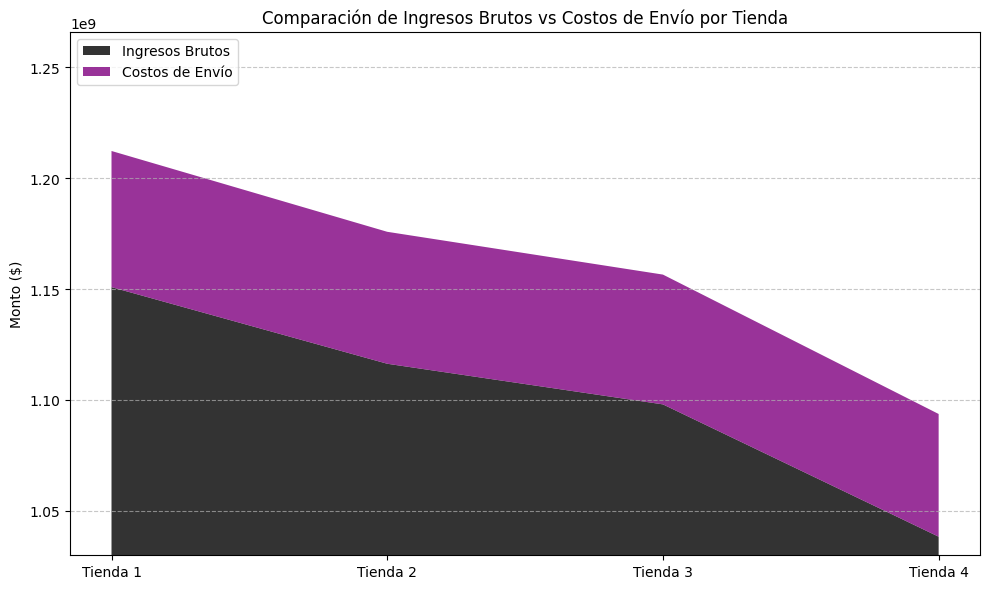